# Object Detection Using OpenCV

## Introduction

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. I am using OpenCV to detect presence of starbucks or Dunkin-Donuts logos in the images to analyze brand visibility of these brands on social media. 

## Importing Essential Libraries 

cv2 - The main computer vision library used to perform operations like morphology and find contours (explained below).

matplotlib - Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. I am using matplotlib for pixel intensity analysis of input images.

numpy - numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

from __ future __ import division - to perform true division throughout the notebook.

### Installing Libraries

Installing these libraries is fairly simple, if you are using a package management system like "pip" you just have to run following command on windows:

pip install libraryname 

This will install the library successfully and one can start using them.

In [163]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

## Defining common functions for code reusability

#### show():
Since I am displaying images multiple times throughout the notebook we are defining a display image function size (15,15). 

Interpolation is a method of constructing new data points within the range of a discrete set of known data points
One of the simplest interpolation algorithms is nearest-neighbor interpolation. In this method, the fractional part of the pixel address is discarded, and the pixel brightness value at the resulting integral address in the source image is copied to the zoomed image. I am using nearest as the interpolation technique to display our images.

#### show_hsv():
By using this function we are converting between color spaces. Here I am using cvtColor function to convert from hsv(Hue-Saturation-Value) color space to BGR(Blue-Green-Red) color space.

In [164]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  # converting HSV to BGR color space.
    show(rgb)

## Loading the Image

Here I am using imread function of OpenCV library to load the image to perform object detection.

In [165]:
# Loading the image
image = cv2.imread('Images/Da04-LaVQAE5wTp.jpg')

In [166]:
#Converting image from BGR to RGB color space.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)

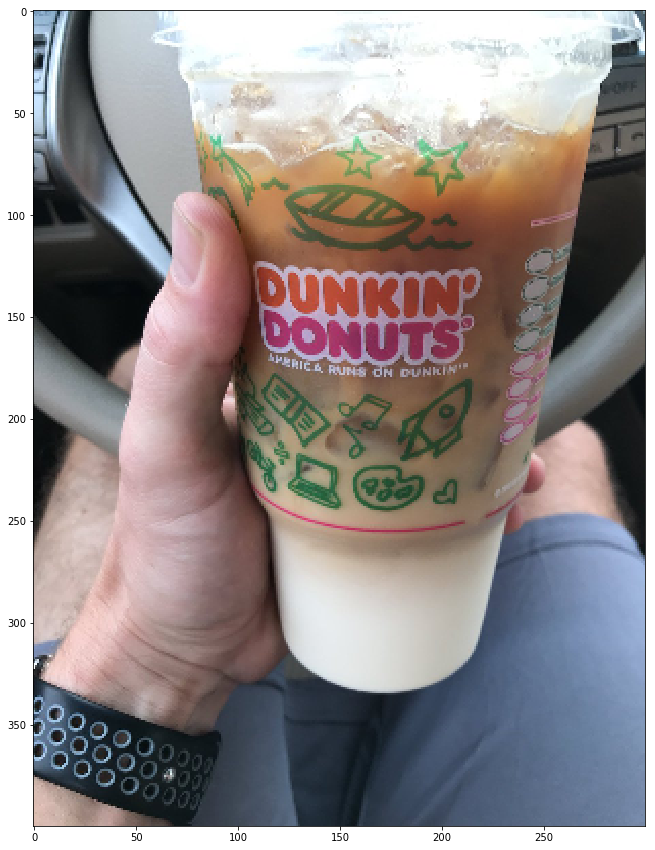

In [167]:
show(image)

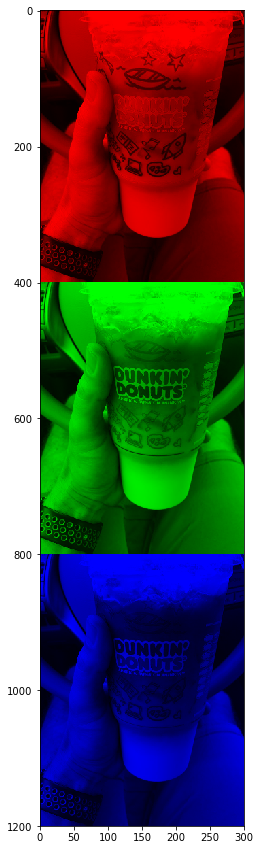

In [168]:
# Displaying image in R, G and B sceme.

images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

## Plotting Histogram of R,G and B color distribution in the image.

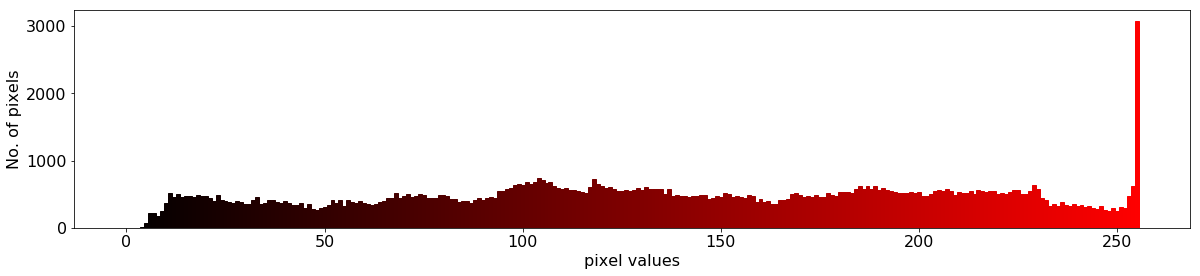

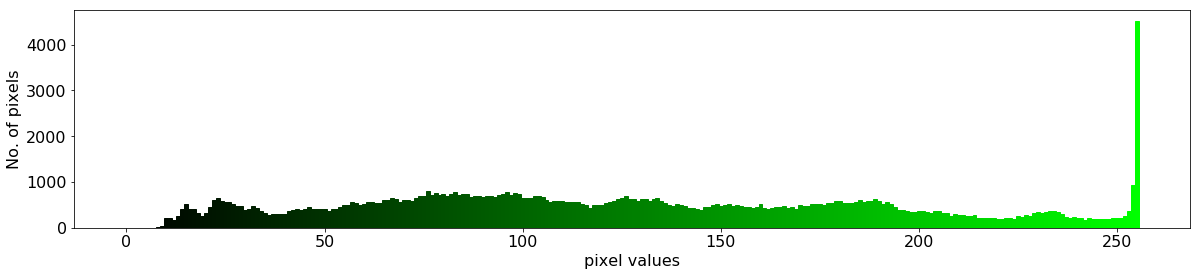

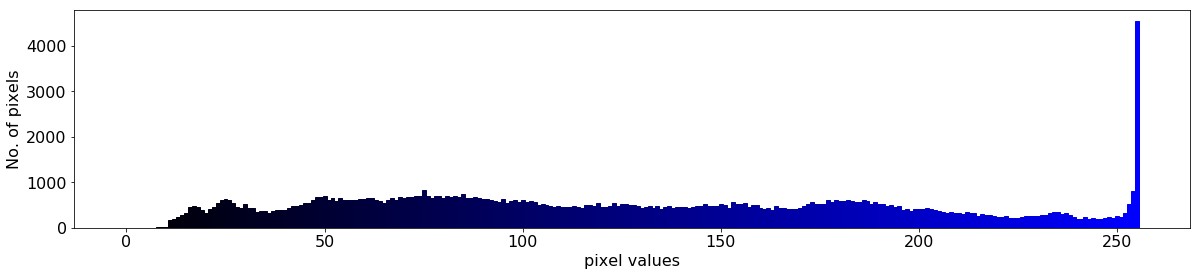

In [182]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.ylabel('No. of pixels')
        plt.xlabel('pixel values')
        plt.show()
       
    
show_rgb_hist(image)

## Displaying Hue, Saturation and Value ranges of the input image 

Plotting the histogram that displays Hue, Saturation and Value spread contained in the image. I am using 'calcHist' function of OpenCV. Left part of the image represents darker pixel values and right part of the image represents lighter pixels.

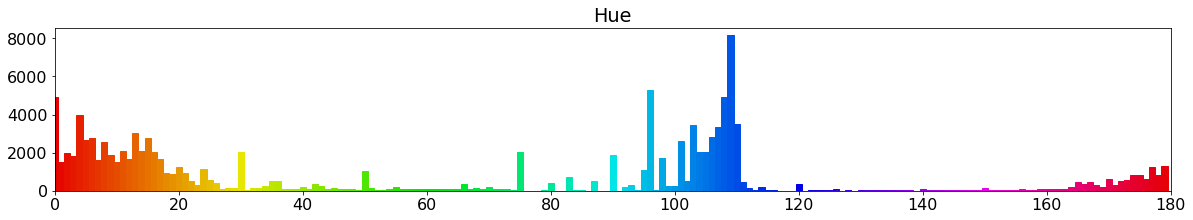

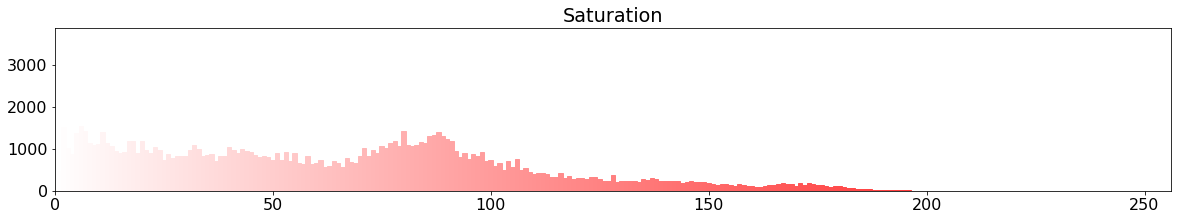

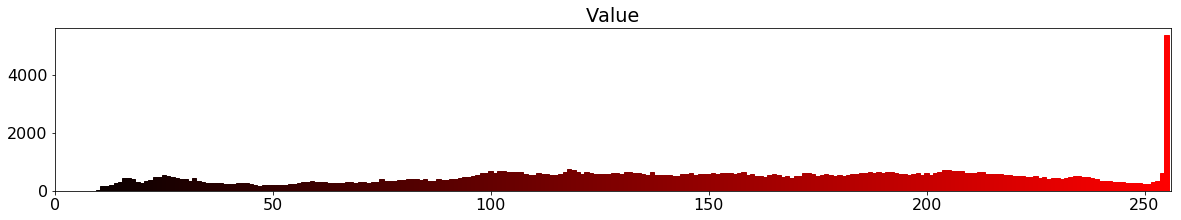

In [170]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]        # hue range in openCV is 0-180
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])                   # Saturation range in openCV is 0-255
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])                   # Value range in openCV is 0-255
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')
    
show_hsv_hist(hsv)

## Gaussian Blur 

In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. Applying a Gaussian blur has the effect of reducing the image's high-frequency components; a Gaussian blur is thus a low pass filter.

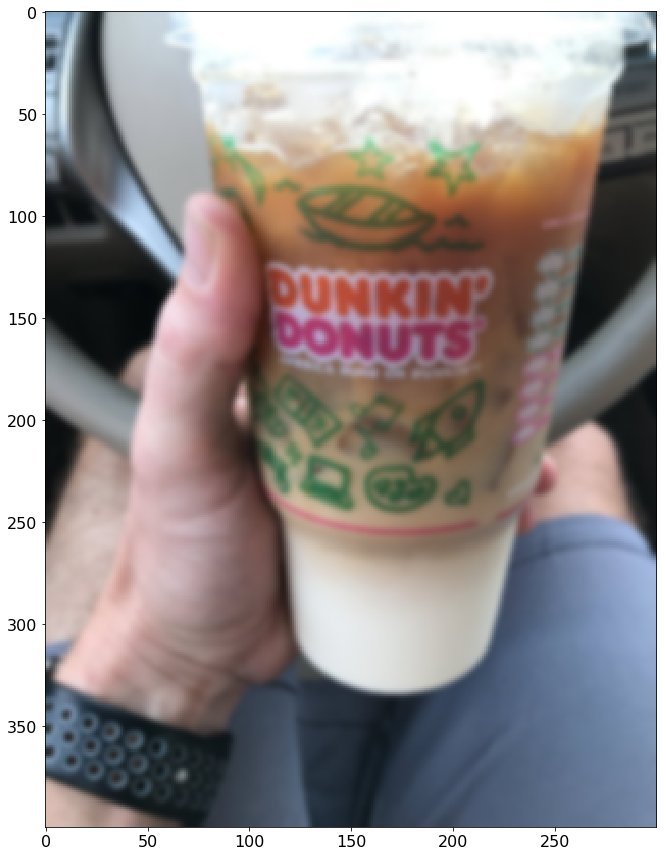

In [171]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

In [172]:
image_blur_1 = cv2.GaussianBlur(image, (7, 7), 0)

## Identifying pixel ranges for brand logo (Starbucks).

Here I am finding areas in the images where pixel values match with the color range of starbucks logo and replacing that area with white pixels and turning rest of the pixels to black.

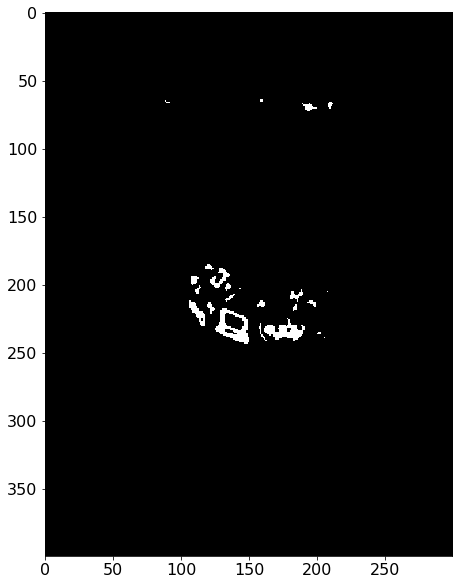

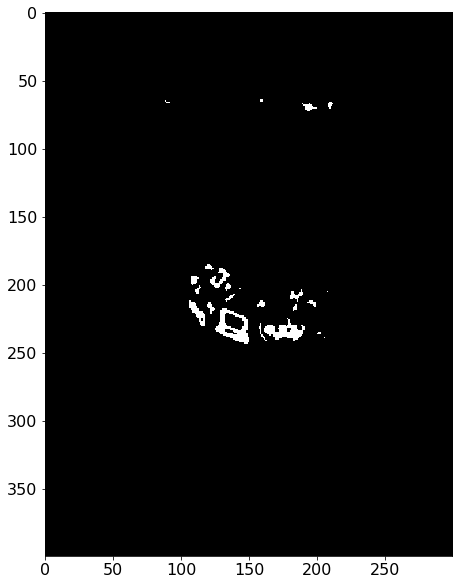

In [173]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

min_red = np.array([50, 60, 60])                        # defining green color minimum image range.  
max_red = np.array([70, 256, 256])                      # defining green color maximum image range.
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

is_starbuckspresent = cv2.countNonZero(image_red1)

show_mask(image_red1)
image_red = image_red1.copy() 
show_mask(image_red)

## Identifying pixel ranges for brand logo (Dunkin Donuts).

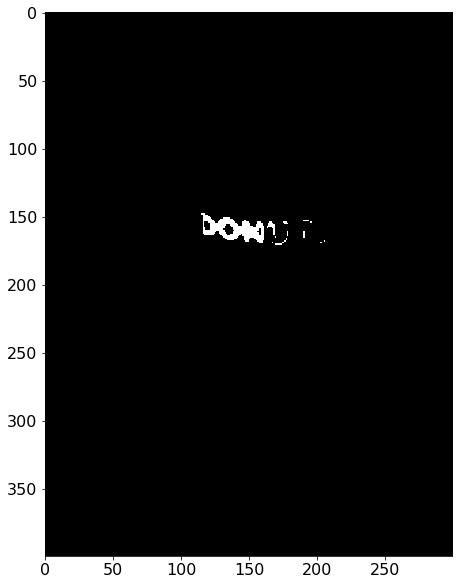

In [174]:
image_blur_hsv_1 = cv2.cvtColor(image_blur_1, cv2.COLOR_RGB2HSV)

min_red_1 = np.array([145, 120, 140])                # defining minimum range of pink color 
max_red_1 = np.array([180, 255, 255])                # defining maximum range of pink color
image_red_1 = cv2.inRange(image_blur_hsv_1, min_red_1, max_red_1)

is_dunkinPresent = cv2.countNonZero(image_red_1)  # checking whether pixel ranges defined above are in the image or not.

image_red_1 = image_red_1.copy()
show_mask(image_red_1)

## Morphology 

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.

### 1. Erosion:
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object. The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image.

### 2. Dilation:
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it.

### 3. Opening: 
Opening is just another name of erosion followed by dilation. It is useful in removing noise, Here we use the function, cv.morphologyEx().
<br/>
<img src="Images/Opening.png" />

### 4. Closing:
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

<img src="Images/Closing.png" />

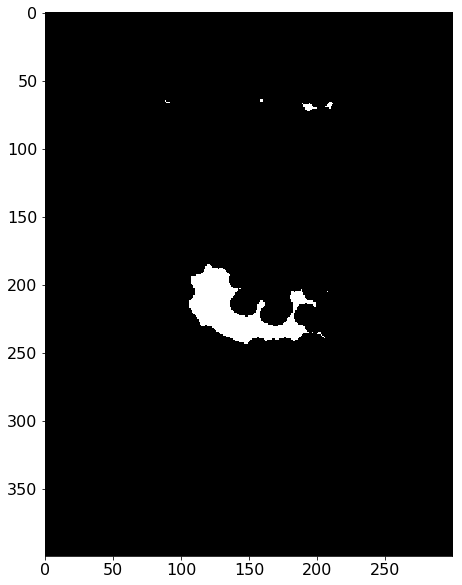

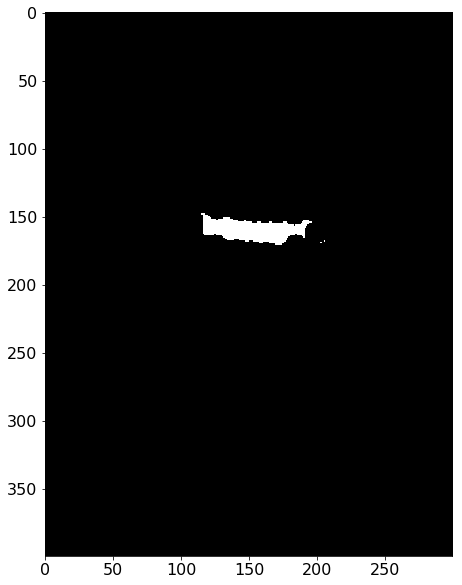

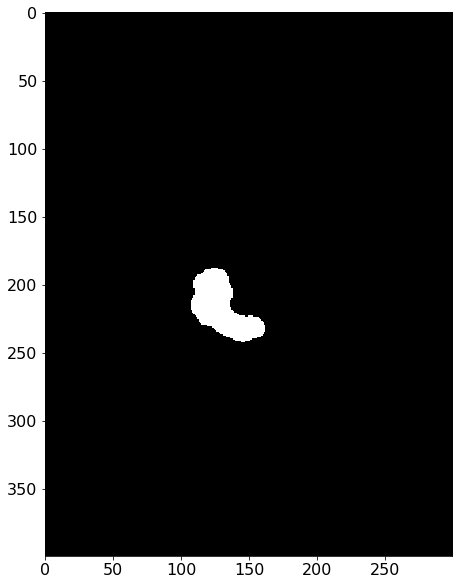

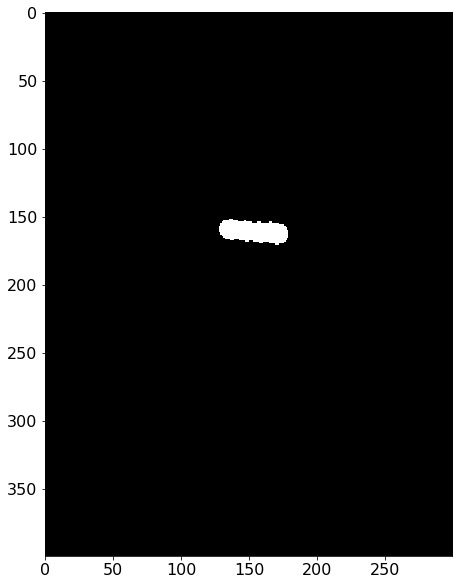

In [175]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

if is_starbuckspresent!=0:
    image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)   # kernel corresponds to sliding window.
    show_mask(image_red_closed)

if is_dunkinPresent!=0:
    image_red_closed_1 = cv2.morphologyEx(image_red_1, cv2.MORPH_CLOSE, kernel)
    show_mask(image_red_closed_1)

# Remove specks
if is_starbuckspresent!=0:
    image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
    show_mask(image_red_closed_then_opened)

if is_dunkinPresent!=0:
    image_red_closed_then_opened_1 = cv2.morphologyEx(image_red_closed_1, cv2.MORPH_OPEN, kernel)
    show_mask(image_red_closed_then_opened_1)


## What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.  Finding contours is like finding white object from black background. Object to be found should be white and background should be black. Here I am finding the biggest contour out of all the contours.

9
3


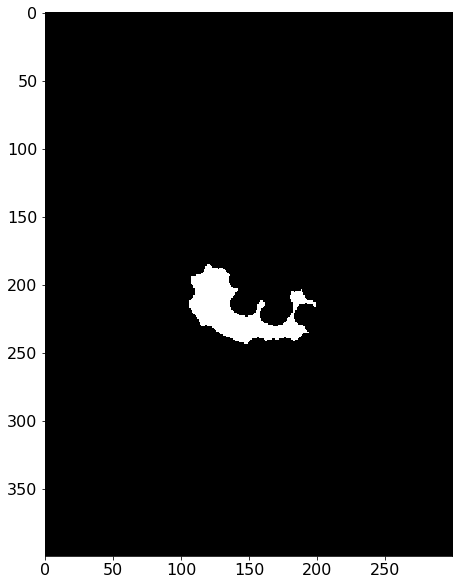

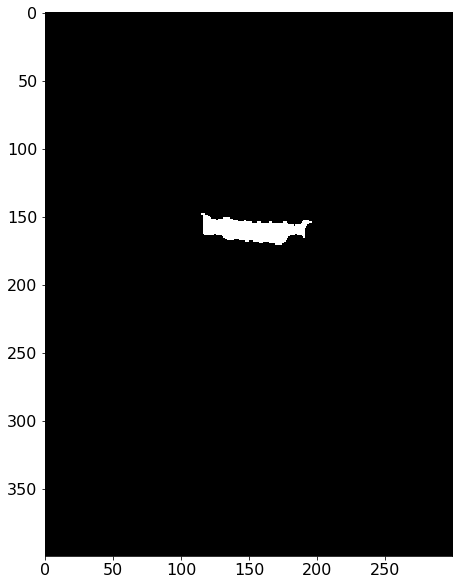

In [176]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    im2,contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]     # selecting the maximum from all the contou
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

if is_starbuckspresent!=0:
    big_contour, red_mask = find_biggest_contour(image_red_closed)
    show_mask(red_mask)

if is_dunkinPresent!=0:
    big_contour_1, red_mask_1 = find_biggest_contour(image_red_closed_1)
    show_mask(red_mask_1)


## Finding center of mass and constructing bounding box around it.

### Image Moment:

In image processing, computer vision and related fields, an image moment is a certain particular weighted average (moment) of the image pixels' intensities, or a function of such moments, usually chosen to have some attractive property or interpretation.
Image moments are useful to describe objects after segmentation. Simple properties of the image which are found via image moments include area (or total intensity), its centroid. 

Centroid is given by the relations, Cx=M10/M00 and Cy=M01/M00. This can be done as show below.

boundingRect - We draw a rectangle considering the center of mass as the center of this rectangle. We draw this to localize a certain part of image(logos) so that we can crop out that part and use this image for logo classification in our CNN model.

## Drawing bounding box for starbucks

(64L, 98L, 3L)
(64L, 64L, 3L)


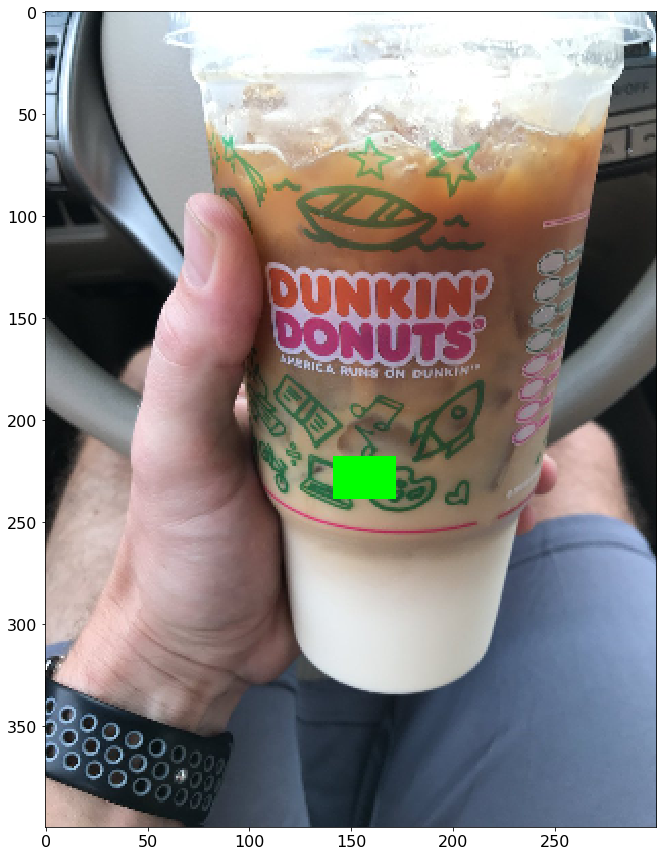

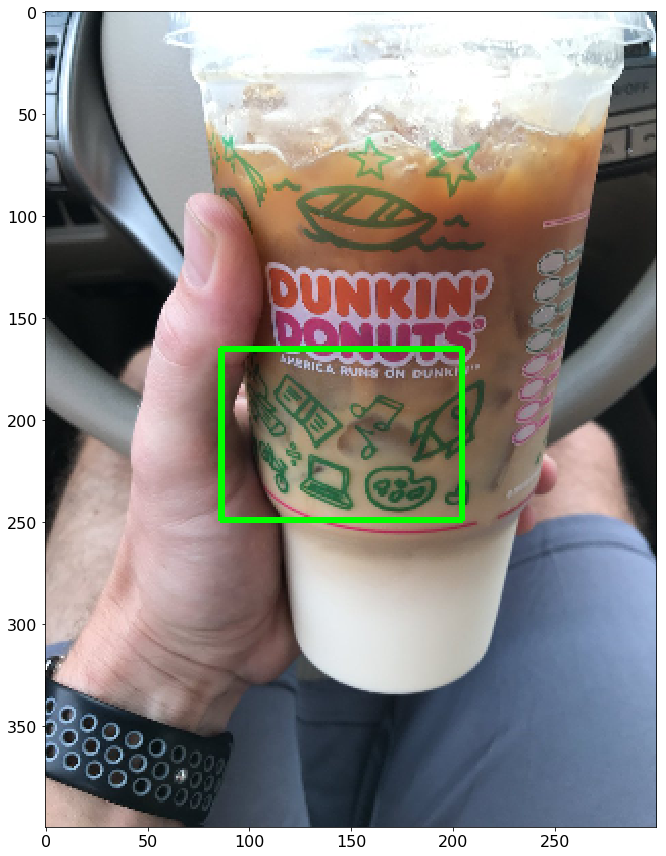

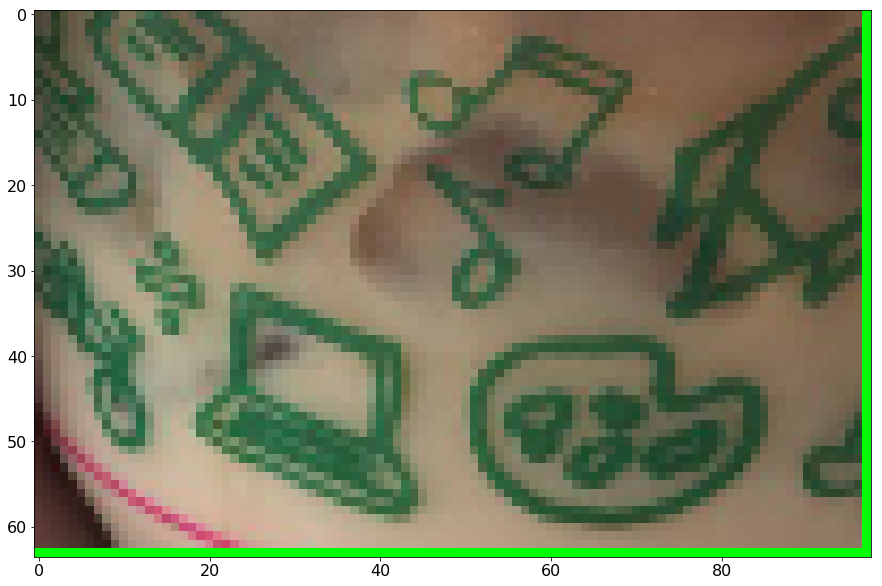

In [177]:
if is_starbuckspresent!=0:
    moments = cv2.moments(red_mask)
    a = int(moments['m10'] / moments['m00'])
    b= int(moments['m01'] / moments['m00'])
    centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
    image_with_com = image.copy()
    cv2.rectangle(image_with_com,centre_of_mass,(a+30,b+20),(0, 255, 0), -1)   
    show(image_with_com)
    image_with_ellipse = image.copy()

    x,y,w,h = cv2.boundingRect(big_contour)
    cv2.rectangle(image_with_ellipse,(x-20,y-20),(x+w+5,y+h+5),(0,255,0),2)
    crop_img = image_with_ellipse[y:y+h+5, x:x+w+5]
    show(image_with_ellipse)
    show(crop_img)

    print(crop_img.shape)

    resized_image = cv2.resize(crop_img, (64, 64)) 

    print(resized_image.shape)


In [178]:
cv2.imwrite('Images\unprocessed\abc.png',resized_image)

True

## Drawing bounding box for Dunkin Donuts logo.

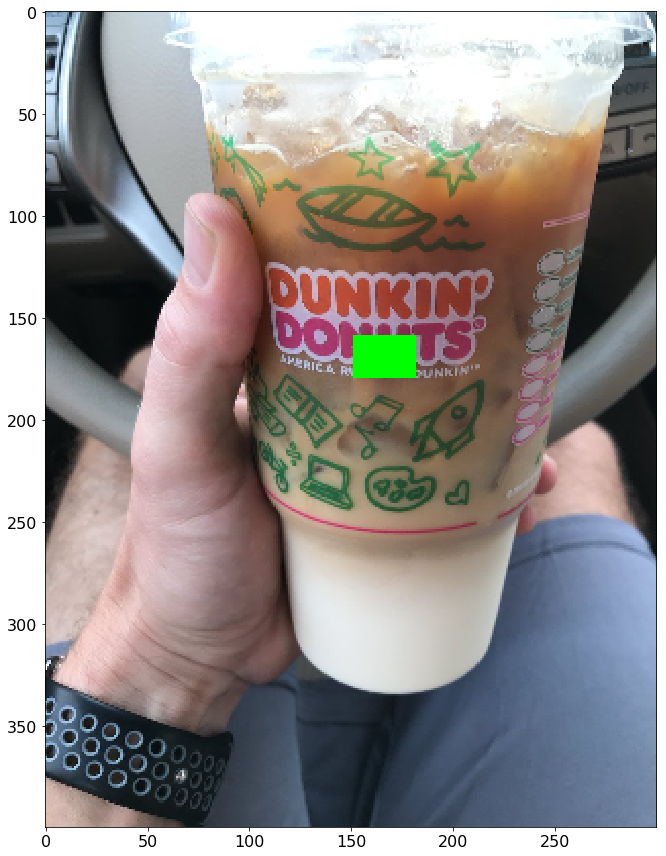

In [179]:
if is_dunkinPresent!=0:
    moments_1 = cv2.moments(red_mask_1)
    a_1 = int(moments_1['m10'] / moments_1['m00'])
    b_1= int(moments_1['m01'] / moments_1['m00'])
    centre_of_mass_1 = int(moments_1['m10'] / moments_1['m00']), int(moments_1['m01'] / moments_1['m00'])

    image_with_com_1 = image.copy()
    cv2.rectangle(image_with_com_1,centre_of_mass_1,(a_1+30,b_1+20),(0, 255, 0), -1)
    show(image_with_com_1)

## Results

Below we can observe a bounding box around the logo of dunkin-donuts which means we have successfully localized logo of our interest and then we are cropping the bounding box part of the image to pass it on to our CNN model for further classification. 

(64L, 64L, 3L)


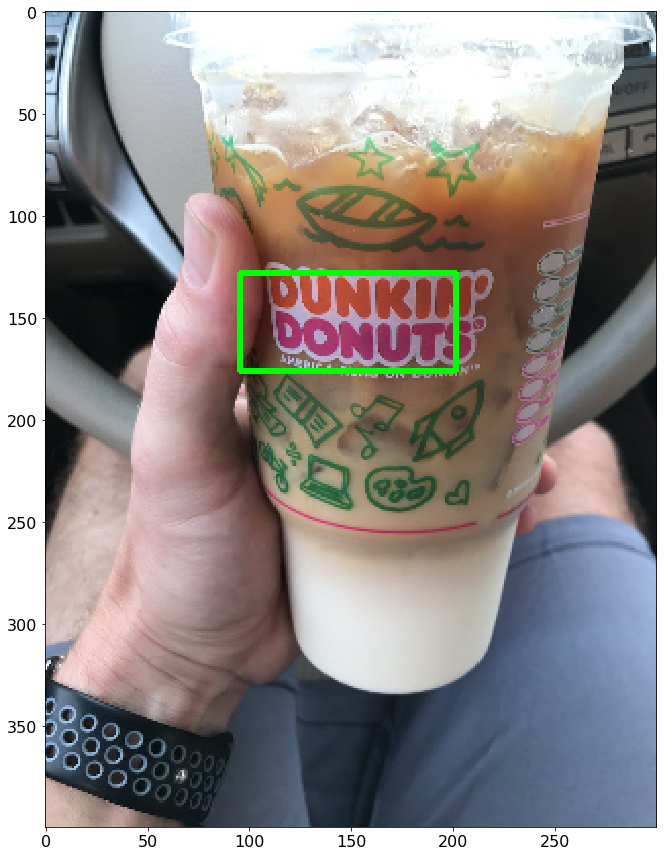

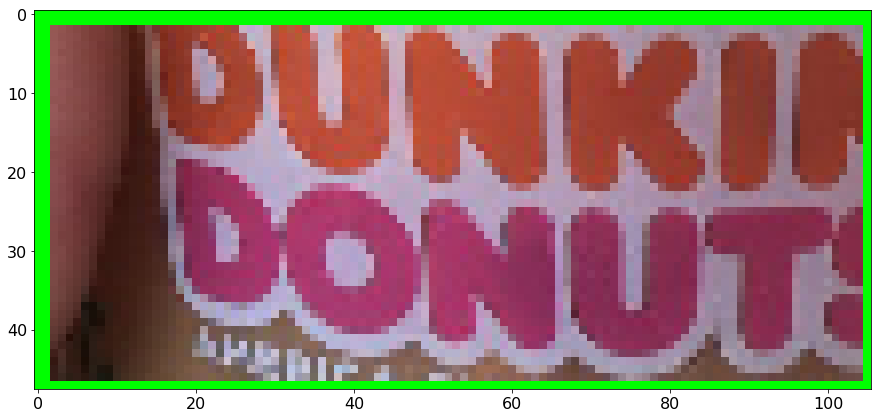

In [180]:
if is_dunkinPresent!=0:
    image_with_ellipse_1 = image.copy()
    x_1,y_1,w_1,h_1 = cv2.boundingRect(big_contour_1)
    cv2.rectangle(image_with_ellipse_1,(x_1-20,y_1-20),(x_1+w_1+5,y_1+h_1+5),(0,255,0),2) #Drawing bounding box around center of mass
    crop_img_1 = image_with_ellipse_1[y_1-20:y_1+h_1+5, x_1-20:x_1+w_1+5] # cropping the bounding box.
    show(image_with_ellipse_1)
    show(crop_img_1)
    resized_image_1 = cv2.resize(crop_img_1, (64, 64)) 
    print(resized_image_1.shape)